# Build a model to separate decays
With the tools we've learned it's possible to build a multivariate statistical model for the Kaggle challenge.
1. Separate the dataset into a training and test parts. I suggest using public_train_100000.root , but you are free to experiment.
2. Fit separate kernel density estimators for signal and background events on the training part. It has quite a few dimensions - you probably should try to find some good combination of features. I suggest you try something from this list: [u'm_jj', u'm_bb', u'm_wbb', u'm_jlv'] (they were obtained using feature importance of random forest)
3. For each element in the test set calculate the signal and background probabilitis - use them to get a score whether the event is signal.
4. Compute ROC AUC evaluation of your prediction. I suggest using sklearn.metrics.roc_auc_score
5. BONUS. Make your model sklearn-compatible. It should be a class inherited from sklearn.base.BaseEstimator and provide .fit and .predict_proba methods.

In [111]:
import root_pandas
events = root_pandas.read_root("/notebooks/public_train_100000.root")
import pandas as pd
import numpy as np

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score

In [113]:
train, test = train_test_split(events)
from sklearn.neighbors import KernelDensity
boolean = train['target'] == 1
no_boolean = train['target'] == 0

In [114]:
kd_signal  = KernelDensity().fit(train[boolean])
kd_background  = KernelDensity().fit(train[no_boolean])

In [116]:
likelihood_signal = kd_signal.score_samples(test)
likelihood_background = kd_background.score_samples(test)
likelihhood_score = -likelihood_signal/likelihood_background
likelihhood_score

array([-0.990254  , -0.60917877, -0.01244022, ..., -1.06056138,
       -1.38487901, -1.49518335])

In [119]:
roc_auc_score(test["target"],likelihhood_score )

0.57859228890238357

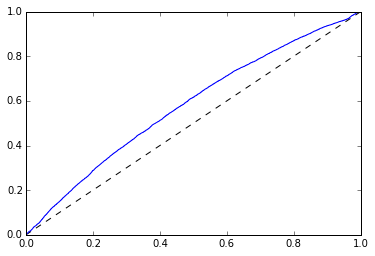

In [118]:
%matplotlib inline
from sklearn.metrics import roc_curve
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(test["target"],likelihhood_score)
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RT + LR')
